## Project Name - Data Visualization Analysis and Statistical Methods for Populations of Possums

##  Abstract:
With the use of statistical analysis, which is a scientific instrument, enormous volumes of data may be gathered, analyzed, 
and turned into useful information by spotting common patterns and trends. The idea is to employ a dataset on which different 
statistical techniques are used in order to make precise predictions. 
We were able to categorize the data with 95.2% accuracy using the projects accuracy score.

## Introduction:
The goal of this projects introduction is to put into practice the statistical techniques that were used to analyze actual data.
Z-test, ANOVA Analysis, Chi Squared Tests of Independence different distributions, categorical analysis of 
data, and regression models are some examples of this but not all of them.

We will make use of the Possum dataset to do this. First, we will use a variety of statistical techniques to track dependencies 
and correlations between the different data columns. To choose the best features from our data to create a logistic regression 
model, I will next use the Forward, Backward, and Recursive elimination procedures. On the basis of our test data, we will 
assess the precision of our logistic regression model.

## Data Description

Data originally found in the DAAG R package and used in the book Maindonald, J.H. and Braun, W.J. (2003, 2007, 2010).

This data appears to describe physical characteristics of Possum animal, possibly with different attributes depending on the 'site' and 'Pop' they belong to.

The features include body parts and measurments such as hdlngth, skullw, totlngth, taill, footlgth, earconch, eye, chest and belly.

Other related observations such as age, sex and population.

## Loading the required Libraries 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot 
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold, KFold
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [5]:
df = pd.read_csv("C:/Users/Haneesh/Downloads/Possum/possum.csv")

In [6]:
print(df.head())

   case  site sex  age  hdlngth  skullw  totlngth  taill  footlgth  earconch  \
0     1     1   m  8.0     94.1    60.4      89.0   36.0      74.5      54.5   
1     2     1   f  6.0     92.5    57.6      91.5   36.5      72.5      51.2   
2     3     1   f  6.0     94.0    60.0      95.5   39.0      75.4      51.9   
3     4     1   f  6.0     93.2    57.1      92.0   38.0      76.1      52.2   
4     5     1   f  2.0     91.5    56.3      85.5   36.0      71.0      53.2   

    eye  chest  belly  Pop  
0  15.2   28.0   36.0  Vic  
1  16.0   28.5   33.0  Vic  
2  15.5   30.0   34.0  Vic  
3  15.2   28.0   34.0  Vic  
4  15.1   28.5   33.0  Vic  


In [7]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


# Data Preprocessing

Checking for null value and dropping them from the data set

In [5]:
df.isnull().sum()

case        0
site        0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
Pop         0
dtype: int64

In [6]:
df=df.dropna()
df.isnull().sum()

case        0
site        0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
Pop         0
dtype: int64

In [7]:
df.replace('Vic',0, inplace=True)
df.replace('other',1, inplace=True)
df.replace('f',10,inplace=True)
df.replace('m',20,inplace=True)

# Checking the Correlation Between all the Variables

In [8]:
corr_matrix=df.corr()
print(corr_matrix)

              case      site       sex       age   hdlngth    skullw  \
case      1.000000  0.972590  0.257541 -0.192688 -0.227342 -0.134138   
site      0.972590  1.000000  0.241195 -0.127688 -0.195820 -0.103363   
sex       0.257541  0.241195  1.000000 -0.057821  0.118705  0.104349   
age      -0.192688 -0.127688 -0.057821  1.000000  0.329505  0.285563   
hdlngth  -0.227342 -0.195820  0.118705  0.329505  1.000000  0.705901   
skullw   -0.134138 -0.103363  0.104349  0.285563  0.705901  1.000000   
totlngth -0.361924 -0.304642 -0.152441  0.268297  0.670402  0.506382   
taill     0.313060  0.372065 -0.029907  0.120205  0.275155  0.241027   
footlgth -0.784031 -0.781489 -0.137153  0.126190  0.415945  0.297197   
earconch -0.798400 -0.818580 -0.133683  0.066234  0.131576  0.025293   
eye      -0.084774 -0.040443  0.212078  0.231857  0.354688  0.314319   
chest    -0.422289 -0.380269 -0.117863  0.335030  0.621068  0.613842   
belly    -0.224667 -0.195044 -0.093835  0.360816  0.545438  0.44

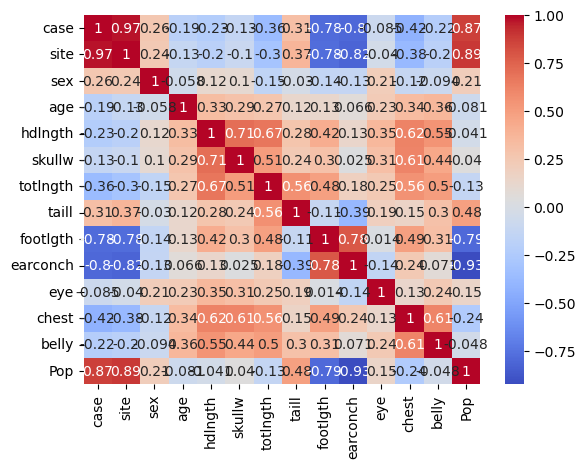

In [9]:
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plot.show()

In [10]:
stat, p=shapiro(df)

In [11]:
alpha = 0.05
if p < alpha:
    print('Normal Distribution')
else:
    print('Not Normal Distribution')

Normal Distribution


## Nonparametric Tests

## Z - test

A z test is conducted on a population that follows a normal distribution with independent data points and has a sample size 
that is greater than or equal to 30. It is used to check whether the means of two populations are equal to each other when the 
population variance is known. The null hypothesis of a z test can be rejected if the z test statistic is statistically 
significant when compared with the critical value

In [12]:
sample1=df.Pop
sample2=df.sex

In [13]:
mean1=np.mean(sample1)
print('mean1:', mean1)
mean2=np.mean(sample2)
print('mean2:', mean2)

mean1: 0.5742574257425742
mean2: 15.841584158415841


In [14]:
std1=np.std(sample1)
print('std1:', std1)
std2=np.std(sample2)
print('std2:', std2)

std1: 0.4944550886805452
std2: 4.928664738476693


In [15]:
n1=len(sample1)
n2=len(sample2)

In [16]:
Z_score=(mean1 - mean2) / np.sqrt((std1**2 / n1)+(std2**2 / n2))
print('Z_score:', Z_score)
p_value= 2 * norm.cdf(- abs(Z_score))
print('p_value:', p_value)

Z_score: -30.97560810963735
p_value: 1.148767599466977e-210


In [17]:
alpha = 0.05
if p_value < alpha: 
    print('reject H0')
else: 
    print('fail to reject H0')

reject H0


# F-Test(One Way Anova)

We are checking that is all the means are equal or not using F-test.

In [18]:
stat,p_value=f_oneway(df.sex,df.site,df.age,df.hdlngth,df.skullw,df.totlngth,df.footlgth,df.taill,df.earconch,df.eye,
df.chest,df.belly)

In [19]:
print(stat,p_value)
print('%.3f'%p_value)

8954.468220777773 0.0
0.000


In [20]:
alpha = 0.05
if p_value > alpha: 
    print('fail to reject H0')
else: 
    print('reject H0') 

reject H0


# Tukey's Honest Significant Test

Tukey’s test compares the means of every treatment to the means of every other treatment; that is, it applies simultaneously to the set of all pairwise comparisons and identifies any difference between two means that is greater than the expected standard error.

The purpose of Tukey’s test is to figure out which groups in your sample differ. It uses the “Honest Significant Difference,” a number that represents the distance between groups, to compare every mean with every other mean.

In [21]:
tukey=pairwise_tukeyhsd(endog=df['site'],groups=df['Pop'],alpha=0.05)
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper reject
------------------------------------------------
     0      1   4.2502   0.0 3.8214 4.679   True
------------------------------------------------


In [22]:
tukey=pairwise_tukeyhsd(endog=df['age'],groups=df['Pop'],alpha=0.05)
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.3103 0.4234 -1.0764 0.4557  False
---------------------------------------------------


In [8]:
tukey=pairwise_tukeyhsd(endog=df['hdlngth'],groups=df['Pop'],alpha=0.05)
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   Vic  other   0.0091 0.9898 -1.3971 1.4153  False
---------------------------------------------------


In [24]:
tukey=pairwise_tukeyhsd(endog=df['skullw'],groups=df['Pop'],alpha=0.05)
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.2469 0.6946 -0.9973 1.4911  False
---------------------------------------------------


In [25]:
tukey=pairwise_tukeyhsd(endog=df['totlngth'],groups=df['Pop'],alpha=0.05)
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1  -1.1307 0.182 -2.7997 0.5384  False
--------------------------------------------------


In [26]:
tukey=pairwise_tukeyhsd(endog=df['taill'],groups=df['Pop'],alpha=0.05)
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   1.9086   0.0 1.2149 2.6023   True
-------------------------------------------------


In [27]:
tukey=pairwise_tukeyhsd(endog=df['footlgth'],groups=df['Pop'],alpha=0.05)
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -7.0338   0.0 -8.1153 -5.9523   True
---------------------------------------------------


In [28]:
tukey=pairwise_tukeyhsd(endog=df['earconch'],groups=df['Pop'],alpha=0.05)
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   -7.563   0.0 -8.1798 -6.9461   True
---------------------------------------------------


In [29]:
tukey=pairwise_tukeyhsd(endog=df['eye'],groups=df['Pop'],alpha=0.05)
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.3147 0.1404 -0.1055 0.7349  False
---------------------------------------------------


In [30]:
tukey=pairwise_tukeyhsd(endog=df['chest'],groups=df['Pop'],alpha=0.05)
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.9814 0.0151 -1.7683 -0.1944   True
----------------------------------------------------


In [31]:
tukey=pairwise_tukeyhsd(endog=df['belly'],groups=df['Pop'],alpha=0.05)
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.2648 0.6319 -1.3582 0.8286  False
---------------------------------------------------


## The Analysis of Categorical Data

## CHI SQUARED TEST OF INDEPENDENCE

The chi-square test of independence is a statistical test used to determine whether two categorical variables are related in the population. It evaluates a null and alternative hypothesis and determines whether the values of one categorical variable depend on the value of other categorical variables. The test is valid when the test statistic is chi-squared distributed under the null hypothesis, and it is used to determine whether there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table.

In [32]:
columns= ['sex','age']

In [33]:
contingency_table = pd.crosstab(df[columns[0]], df[columns[1]])
print(contingency_table)

age  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0
sex                                             
10     3    7   11    6    5    7    1    0    2
20     7    9   16    8    7    5    6    1    0


In [34]:
chi_2,p_value,dof,expected= chi2_contingency(contingency_table)

In [35]:
print('Chi-squared value:', chi_2)
print('P-value:', p_value)
print('Degrees of freedom:', dof)
print('Expected values:', expected)

Chi-squared value: 7.6552261221500535
P-value: 0.46785207442448074
Degrees of freedom: 8
Expected values: [[ 4.15841584  6.65346535 11.22772277  5.82178218  4.99009901  4.99009901
   2.91089109  0.41584158  0.83168317]
 [ 5.84158416  9.34653465 15.77227723  8.17821782  7.00990099  7.00990099
   4.08910891  0.58415842  1.16831683]]


In [36]:
q=0.95
from scipy.stats import chi2
critical=chi2.ppf(q,dof)
critical

15.507313055865453

In [37]:
if chi_2 > critical: 
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


## Linear Regression

Linear regression is a commonly used statistical technique for modeling the relationship between a dependent variable (also known as the response or outcome variable) and one or more independent variables (also known as predictor or explanatory variables).It can be used to predict future trends, identify relationships between variables, and quantify the impact of different variables on the outcome variable.

In [38]:
X=df[['site','sex','age','hdlngth','skullw','totlngth','taill','footlgth','earconch','eye','chest','belly']]
Y=df['Pop']

In [39]:
print(X.shape)
print(Y.shape)

(101, 12)
(101,)


In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.2,random_state=0)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(20, 12)
(81, 12)
(20,)
(81,)


In [42]:
linear_regression = LinearRegression()

In [43]:
df.replace('m',20,inplace=True)

In [44]:
linear_regression.fit(X,Y)

LinearRegression()

In [45]:
predictions = linear_regression.predict(X)

In [46]:
mse = mean_squared_error(Y, predictions)
mse

0.012819090540341917

In [47]:
R2 = r2_score(Y, predictions)
R2

0.947567144105041

In [48]:
print(df.isnull().sum())

case        0
site        0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
Pop         0
dtype: int64


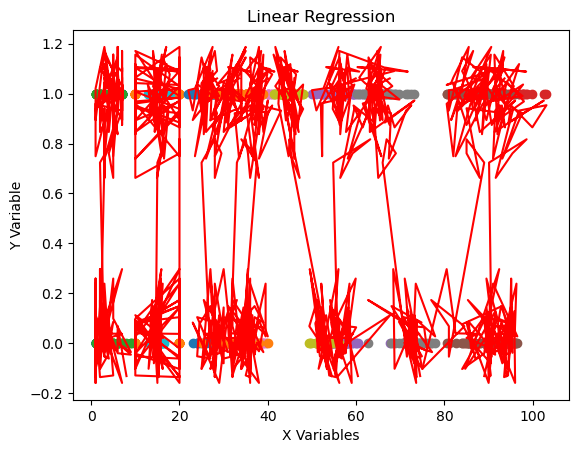

In [49]:
for col in X.columns:
    plot.scatter(X[col], Y)
plot.plot(X,predictions,color='red')

plot.xlabel('X Variables')
plot.ylabel('Y Variable')
plot.title('Linear Regression')

plot.show()

## Resampling Method

Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform.

In stratified k-fold cross-validation, the data is split into k-folds, where each fold has an equal proportion of samples of each target class as the complete data set. This ensures that the distribution of the target variable is preserved across all folds, which can lead to better and more reliable model performance estimation.

In [50]:
X=df[['site','taill']]
Y=df['Pop']

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [52]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [53]:
lr.score(X_test,Y_test)

1.0

In [54]:
SKF = StratifiedKFold(n_splits = 7)
KF = KFold(n_splits = 7)

In [55]:
scores_logistic_KF = []
scores_logistic_SKF = []

In [56]:
for train_index, test_index in KF.split(X,Y):
    X_train,X_test,Y_train,Y_test=X.iloc[train_index], X.iloc[test_index],Y.iloc[train_index], Y.iloc[test_index]
    lr.fit(X_train, Y_train)
    score = lr.score(X_test, Y_test)
    scores_logistic_KF.append(score)
    
for train_index, test_index in SKF.split(X,Y):
    X_train,X_test,Y_train,Y_test=X.iloc[train_index], X.iloc[test_index],Y.iloc[train_index], Y.iloc[test_index]
    lr.fit(X_train, Y_train)
    score = lr.score(X_test, Y_test)
    scores_logistic_SKF.append(score)

In [57]:
print(scores_logistic_KF)
print(scores_logistic_SKF)

[1.0, 1.0, 1.0, 0.9285714285714286, 1.0, 1.0, 1.0]
[0.7333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [58]:
print(np.average(scores_logistic_KF))
print(np.average(scores_logistic_SKF))

0.9897959183673469
0.9619047619047619


## Linear Model Selection and Regularization

Linear model selection is the process of choosing which variables or features to include in a linear regression model. The main aim of model selection is to identify the most important and relevant variables to predict the response variable.

Lasso and Ridge regularization methods work by adding a penalty term to the objective function of our linear model, which can help prevent overfitting by shrinking the coefficients towards zero. Lasso has the additional property of performing variable selection by driving some coefficients to exactly zero, effectively removing those variables from the model. This can be useful in identifying the most important predictor variables for our response variable.

In [59]:
X=df[['site','sex','age','hdlngth','skullw','totlngth','taill','footlgth','earconch','eye','chest','belly']]
Y=df['Pop']

In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [61]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [62]:
y_pred = lin_reg.predict(X_test)

In [63]:
mse = mean_squared_error(Y_test, y_pred)

In [64]:
rmse = np.sqrt(mse)

In [65]:
print("Linear Regression RMSE:", rmse)

Linear Regression RMSE: 0.13021948842871592


In [66]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=0.1)

In [67]:
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train, Y_train)

Ridge(alpha=0.1)

In [68]:
y_pred_lasso = lasso_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)

In [69]:
mse_lasso = mean_squared_error(Y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
print("Lasso RMSE:", rmse_lasso)

Lasso RMSE: 0.13298649075759097


In [70]:
mse_ridge = mean_squared_error(Y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print("Ridge RMSE:", rmse_ridge)

Ridge RMSE: 0.1302069092435807


## Forward Selection

Forward selection is a type of stepwise feature selection technique which begins with an empty model and adds in variables one by one. In each forward step, you add the one variable that gives the single best improvement to your model.

In [71]:
X=df[['site','sex','age','hdlngth','skullw','totlngth','taill','footlgth','earconch','eye','chest','belly']]
Y=df['Pop']

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [73]:
ffs = SFS(RFC(n_jobs=-1), k_features=(1,12), forward=True, floating=False, verbose=3, scoring='accuracy', cv=3).fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    9.0s finished

[2023-05-05 16:25:03] Features: 1/12 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    5.0s finished

[2023-05-05 16:25:08] Features: 2/12 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out 

In [74]:
ffs.k_feature_idx_

(0,)

In [75]:
ffs.k_feature_names_

('site',)

In [76]:
ffs.k_score_

1.0

## Backward Selection

backward elimination is totally opposite to forward. In that, you start with a model that includes every possible variable and eliminate the extraneous variables one by one

In [77]:
X=df[['site','sex','age','hdlngth','skullw','totlngth','taill','footlgth','earconch','eye','chest','belly']]
Y=df['Pop']

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [79]:
bfs = SFS(RFC(n_jobs=-1), k_features=(1,12), forward=False, floating=True, verbose=2, scoring='accuracy', cv=3)

In [80]:
bfs.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    5.5s finished

[2023-05-05 16:25:39] Features: 11/1 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    4.9s finished

[2023-05-05 16:25:45] Features: 10/1 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | 

SequentialFeatureSelector(cv=3, estimator=RandomForestClassifier(n_jobs=-1),
                          floating=True, forward=False, k_features=(1, 12),
                          scoring='accuracy', verbose=2)

In [81]:
bfs.k_feature_idx_

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)

In [82]:
bfs.k_feature_names_

('site',
 'sex',
 'age',
 'hdlngth',
 'skullw',
 'totlngth',
 'taill',
 'footlgth',
 'earconch',
 'eye',
 'chest',
 'belly')

In [83]:
bfs.k_score_

1.0

## L1 Regularization

L1 and L2 regularization are techniques to prevent overfitting by adding a penalty term to the cost function. L1 regularization uses the absolute value of the weights. L1 regularization tends to estimate the median of the data. L1 regularization also results in a sparse solution, meaning some weights are zero, which can be useful for feature selection.

In [84]:
X=df[['site','sex','age','hdlngth','skullw','totlngth','taill','footlgth','earconch','eye','chest','belly']]
Y=df['Pop']

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [86]:
clf = LogisticRegression(penalty='l1', solver='saga', C=0.1, max_iter=1000)
clf.fit(X_train, Y_train)

C:\Users\Haneesh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='saga')

In [87]:
print('Training accuracy:', clf.score(X_train, Y_train))
print('Testing accuracy:', clf.score(X_test, Y_test))

Training accuracy: 1.0
Testing accuracy: 1.0


## PCA(Principal Component Analysis)

PCA (Principal Component Analysis) is a statistical technique used for data reduction without losing its properties. It is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation. PCA enables us to better generalize machine learning models by reducing the dimensionality of the data. The technique involves transforming a large set of variables into a smaller one that still contains most of the information in the large set

In [88]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [89]:
scaled_data = scaler.transform(df)
scaled_data

array([[-1.7014694 , -1.13507515,  0.84372057, ...,  0.46533378,
         1.2384409 , -1.16139451],
       [-1.66859862, -1.13507515, -1.18522652, ...,  0.71400422,
         0.13314608, -1.16139451],
       [-1.63572785, -1.13507515, -1.18522652, ...,  1.46001552,
         0.50157768, -1.16139451],
       ...,
       [ 1.61847883,  1.41253797, -1.18522652, ..., -1.02668882,
        -0.97214875,  0.86103386],
       [ 1.6513496 ,  1.41253797,  0.84372057, ..., -1.02668882,
        -1.34058036,  0.86103386],
       [ 1.68422038,  1.41253797, -1.18522652, ...,  0.71400422,
         0.31736188,  0.86103386]])

In [90]:
pca=PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [91]:
x_pca=pca.transform(scaled_data)

In [92]:
scaled_data.shape

(101, 14)

In [93]:
x_pca.shape

(101, 2)

In [94]:
x_pca

array([[-3.63278588,  0.0099478 ],
       [-2.95309913,  0.39990247],
       [-3.96692186, -0.88118687],
       [-3.3003262 ,  0.31377298],
       [-2.08176926,  1.88492202],
       [-2.65272711,  1.93205589],
       [-2.72747346,  0.60313216],
       [-3.29915791,  0.4422954 ],
       [-3.09026049,  0.30685496],
       [-2.40298117,  1.05399269],
       [-3.71490079, -0.39089394],
       [-2.64673556,  0.78138824],
       [-2.19955652,  0.1943574 ],
       [-2.72138073,  0.8962876 ],
       [-2.10390321,  1.03205008],
       [-1.79399937,  1.97308396],
       [-3.1073723 ,  0.21715443],
       [-2.3914162 ,  1.48743535],
       [-2.73564655,  1.38173011],
       [-2.6610097 ,  0.36523394],
       [-4.27520827, -1.0796342 ],
       [-2.8363833 , -0.87572591],
       [-2.54793799,  1.05198494],
       [-1.86244937,  2.08473044],
       [-3.02827352, -0.08781084],
       [-3.70067058, -0.33988469],
       [-0.10386415,  3.53511939],
       [-1.80533556,  1.75730305],
       [-1.53076542,

Text(0, 0.5, 'Second principle component')

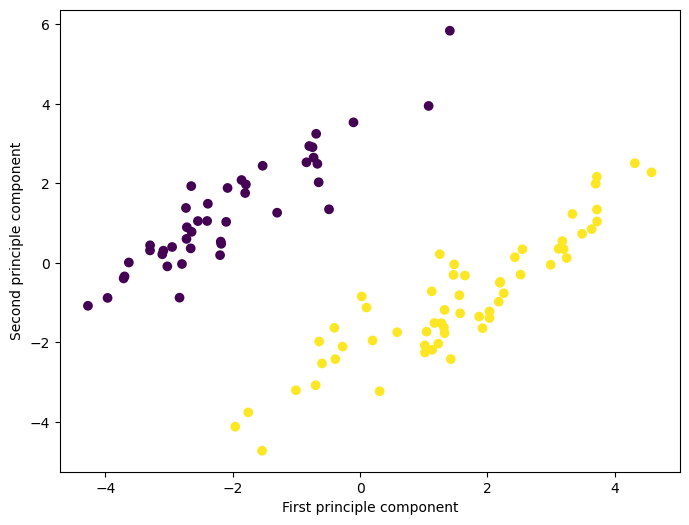

In [95]:
plot.figure(figsize=(8,6))
plot.scatter(x_pca[:,0],x_pca[:,1],c=df['Pop'])
plot.xlabel('First principle component')
plot.ylabel('Second principle component')

## Recursive Feature Selection

Recursive Feature Elimination, or RFE for short, is a popular feature selection algorithm. RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.

In [96]:
X=df[['site','sex','age','hdlngth','skullw','totlngth','taill','footlgth','earconch','eye','chest','belly']]
Y=df['Pop']

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [98]:
lr = LinearRegression()

In [99]:
selector = RFE(lr, n_features_to_select=3, step=1)
selector = selector.fit(X_train, Y_train)

In [100]:
X.shape[1]

12

In [101]:
selected_features = X.columns[selector.support_]
selected_features

Index(['site', 'taill', 'earconch'], dtype='object')

In [102]:
lr.fit(X_train[selected_features], Y_train)

LinearRegression()

In [103]:
y_pred = lr.predict(X_test[selected_features])

In [104]:
R2 = r2_score(Y_test, y_pred)
R2

0.8964557631416399

## Moving Beyond Linearity

nonlinear regression is a form of regression analysis in which observational data are modeled by a function which is a nonlinear combination of the model parameters and depends on one or more independent variables. The data are fitted by a method of successive approximations.

In [105]:
X=df[['site','sex','age','hdlngth','skullw','totlngth','taill','footlgth','earconch','eye','chest','belly']]
Y=df['Pop']

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [107]:
degree = [2,3,4]
for i in degree:
    poly = PolynomialFeatures(degree=int(i))
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train,Y_train)
    y_pred = lin_reg.predict(X_poly_test)
    r_squared = r2_score(Y_test,y_pred)
    print('R-squared for degree'+str(i)+':'+' '+str(r_squared))

R-squared for degree2: 0.024992102850834086
R-squared for degree3: 0.5644619092409253
R-squared for degree4: 0.5625941013275446


## Logistic Regression

Logistic regression is a statistical technique used for modeling the relationship between a binary response variable and one or more predictor variables. The aim of logistic regression is to predict the binary outcome (e.g., 0 or 1, yes or no) based on the values of the predictor variables.It can be used to predict the likelihood of an event happening or not happening based on the values of predictor variables, such as predicting the likelihood of a patient developing a disease or predicting the likelihood of a customer buying a product.

In [108]:
X=df[['site', 'taill']]
Y=df['Pop']

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [110]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [111]:
y_pred = model.predict(X_test)

In [112]:
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.9523809523809523

In [113]:
f1 = f1_score(Y_test, y_pred)
f1

0.9523809523809523

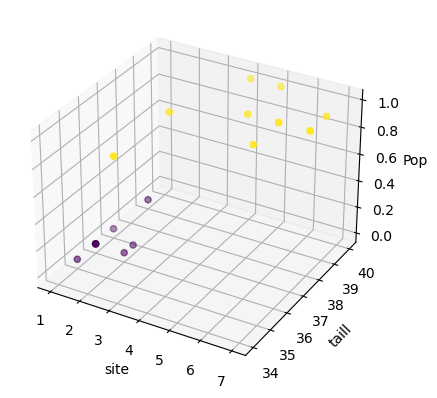

In [114]:
fig = plot.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['site'], X_test['taill'], Y_test, c=Y_test)

ax.set_xlabel('site')
ax.set_ylabel('taill')
ax.set_zlabel('Pop')

plot.show()

## Conclusion

We have effectively applied statistical techniques such as non-parametric testing and categorical data analysis to determine the relationship between the numeric input columns and output categorical columns, and examined the relationship between the input and output categorical variables using the chi-squared test of independence.

We have then utilized feature selection techniques and the logistic regression model to choose the best predictive features and fit the model to predict the possum population.

Finally, when the model fit was evaluated using the test set, you have achieved an accuracy of 95.2%. This indicates that the model is capable of accurately predicting the possum population using the selected features.